<h1 style="text-align: center">Завдання на навчальну практику з програмування</h1>

<h4>Мета: Метою цієї лабораторної роботи є вивчення та розуміння функцій Лаґерра, їх обчислення та табулювання, проведення обчислювального експерименту для визначення точки при якій значення всіх функції Лаґерра менші за ε, обчислення значень інтегралів, виконання прямого та оберненого ПЛ для заданої функції, а також побудову графіків для візуалізації результатів.</h4>

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

1. Побудувати функцiю для обчислення значення функцiї Лаґерра за формулою (1.2) для довiльних t i n, а параметри задавати за замовчуванням β = 2, σ = 4.

In [94]:
def laguerre(t, n, beta=0, sigma=1):
    if beta < 0 or beta > sigma:
        raise ValueError("Wrong parameters")

    lpp = np.sqrt(sigma)*np.exp(-beta*t/2)
    lp = np.sqrt(sigma)*(1 - sigma*t)*np.exp(-beta*t/2)

    if n == 0:
        return lpp
    if n == 1:
        return lp

    for i in range(2, n+1):
        temp = lp
        lp = (2*i - 1 - sigma*t)*lp/i - (i-1)*lpp / i
        lpp = temp

    return lp

<hr>

2. Побудувати функцiю для табулювання при заданих n, β, σ функцiї
Лаґерра на вiдрiзку [0, T] iз заданим T ∈ R+

In [95]:
def tabulate_laguerre(T, n, beta, gamma):
    t = np.linspace(1, T, T)
    results = laguerre(t, n, beta, gamma)
    df = pd.DataFrame({'t': t, 'l': results})
    return df.round(5)

In [96]:
print("Табульована функція Лагера для T=5, n=3, beta=2, sigma=4")
tabulate_laguerre(5, 3, 2, 4)

Табульована функція Лагера для T=5, n=3, beta=2, sigma=4


,t,l
0,1.0,1.71677
1,2.0,-3.33827
2,3.0,-10.65443
3,4.0,-12.66221
4,5.0,-10.67740


Висновок: функція для табулювання функції Лаґерра на відрізку [0, T] була побудована та використана для генерації таблиці значень.

<hr>

3. Провести обчислювальний експеримент: для N = 20 на основi графiкiв з п.2 знайти точку T > 0, щоб |ln(T)| < ε = 10e−3 для усiх n ∈ [0, N].<br>Побудувати табличку для |ln(T)| для усiх n ∈ [0, N].

In [97]:
def experiment(N, beta, sigma, max_T=100, epsilon=0.00001):
    t = np.linspace(0, max_T, 1000)
    n = range(0, N+1)
    true_for_all = False
    result = 0
    for i in t:
        for j in n:
            if abs(laguerre(i, j, beta, sigma)) < epsilon:
                true_for_all = True
            else:
                true_for_all = False
        if true_for_all:
            result = i
            break
    else:
        result = None
    if result == None:
        raise "The experiment is failed, there is no T that satisfy condition. You can set bigger max T to check"
    return result

In [98]:
def tabulate_experiment(N, max_T=100, epsilon=0.001, beta=2, sigma=4):
    t = experiment(N, beta, sigma, max_T, epsilon)
    lt_values = []
    for n in range(0, N+1):
        lt_values.append(laguerre(t, n, beta, sigma))
    cols = {"t": [t]*(N+1), "n": range(0, N+1), "L(t)": lt_values}

    return pd.DataFrame(cols).round(5)

In [99]:
print("Табюльований екперемент для N=20, beta=2, sigma=4")
tabulate_experiment(20, 100, 0.001, 2, 4)

Табюльований екперемент для N=20, beta=2, sigma=4


,t,n,L(t)
0,79.07908,0,0.00000
1,79.07908,1,-0.00000
2,79.07908,2,0.00000
3,79.07908,3,-0.00000
4,79.07908,4,0.00000
5,79.07908,5,-0.00000
6,79.07908,6,0.00000
7,79.07908,7,-0.00000
8,79.07908,8,0.00000
9,79.07908,9,-0.00000


Висновок: був проведений експеремент в ході якого ми відшукали точку T≈79 і перевірив що значення функції Лаґерра для кожного n ∈ [0, N] менше за  ε = 10e−3

<hr>

4. Побудувати функцiю для обчислення значень iнтегралiв (1.3) наближено за формулою <br> 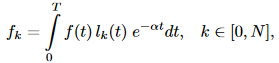

In [100]:
def integral(f, a, b, margin=0.001):
    area = 0
    while (abs(b-a) > margin/10):
        area += margin*f(a+margin/2)
        a = a+margin
    return area

In [101]:
def laguerre_transformation(f, N, epsilon=0.001, beta=2, sigma=4):
    to = experiment(N, beta, sigma, 1000, epsilon)
    return [integral(lambda t: f(t)*laguerre(t, k, beta, sigma)
                     * np.exp(-t*(sigma-beta)), 0, to, epsilon) for k in range(N+1)]

<hr>

5. Для функцiї <br> 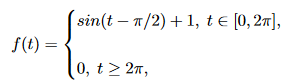 <br>виконати ПЛ, а саме знайти коефiцiєнти f^N := (f0, f1, ..., fN)^⊤ при N = 20.

In [102]:
def func5(t):
    if t >= 0 and t <= 2*np.pi:
        return np.sin(t-np.pi/2) + 1
    else:
        return 0

In [103]:
def tabulate_laguerre_transformation(f, N, epsilon=0.001, beta=2, sigma=4):
    transformed = laguerre_transformation(f, N, epsilon, beta, sigma)
    cols = {"n": range(0, N+1), "transformed": transformed}
    return pd.DataFrame(cols).round(5)

In [104]:
print("Табульована трансформація Лагера для N=20")
tabulate_laguerre_transformation(func5, 20)

Табульована трансформація Лагера для N=20


,n,transformed
0,0,0.06667
1,1,-0.18222
2,2,0.17807
3,3,-0.07429
4,4,0.00726
5,5,0.00759
6,6,-0.00310
7,7,-0.00061
8,8,0.00080
9,9,-0.00003


<hr>

6. Побудувати функцiю, яка для заданої послiдовностi h^N = (h0, h1, ..., hk, ... hN , 0, 0, ...)⊤, N ∈ N, (яка має скiнчене число вiдмiнних вiд нуля елементiв) обчислює значення функцiї h~^N(t) у точцi t ∈ R+ за формулою (1.4).

In [105]:
def reverse_laguerre_transformation(f, N, t, transformed, beta=2, sigma=4):
    sum = 0
    for k in range(N):
        sum += transformed[k] * laguerre(t, k, beta, sigma)
    return sum

<hr>

7. За даними завдання 2 побудувати графiки функцiй Лаґерра ln(t), t ∈ [0, T], n ∈ [0, N].

In [106]:
def draw_lauguerre(T, N, beta=2, sigma=4):
    x = np.arange(0, T+1, 0.01)
    fig, ax = plt.subplots()
    ax.set_title(r'Laguerre polynomials $L_n$')
    for n in np.arange(0, N+1):
        ax.plot(x, laguerre(x, n, beta, sigma), label=rf'$L_{n}$')
    plt.xlabel('t')
    plt.ylabel('L(t)')
    plt.title('Plot of Laguerre function')
    plt.legend()
    plt.grid(True)
    plt.show()

In [107]:
n_slider =  widgets.IntSlider(value=1, min=1, max=15, step=1, description='N=')

### Графік функції Легера для t ∈ [0, 20], n ∈ [0, N], β = 2, σ = 4.

In [108]:
n_slider1 =  widgets.IntSlider(value=5, min=1, max=10, step=1, description='N=')
interactive_plot1 = interactive(draw_lauguerre, T=widgets.fixed(20), N=n_slider1, beta=widgets.fixed(2), sigma=widgets.fixed(4))

display(interactive_plot1)

interactive(children=(IntSlider(value=5, description='N=', max=10, min=1), Output()), _dom_classes=('widget-in…

<hr>

7. Для функцiї <br> 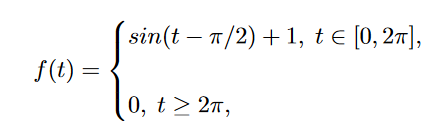 <br> виконати пряме i обернене ПЛ при деяких значеннях N. Побудувати графiк функцiї f~N(t), t ∈ [0, 2π].

In [109]:
def draw_rlt(f, N, epsilon=0.001, beta=2, sigma=4):
    transformed = laguerre_transformation(f, N, epsilon, beta, sigma)

    def f_rlt(x):
        return reverse_laguerre_transformation(
            f, N, x, transformed, beta, sigma)
    t_values = np.linspace(0, 2*np.pi, 100)
    f_y_values = np.vectorize(f)(t_values)
    f_rlt_y_values = np.vectorize(f_rlt)(t_values)
    plt.plot(t_values, f_rlt_y_values, label=f"L")
    plt.plot(t_values, f_y_values, label="F")
    plt.xlabel('t')
    plt.ylabel('Function Value')
    plt.title('Plot of func5(t)')
    plt.legend()
    plt.grid(True)
    plt.show()

### Графік оберненої трансформації Лагера для t ∈ [0, 2π], n = 10, β = 2, σ = 4.

In [110]:
n_slider2 =  widgets.IntSlider(value=6, min=1, max=15, step=1, description='N=')
interactive_plot2 = interactive(draw_rlt,f=widgets.fixed(func5), N=n_slider, epsilon=widgets.fixed(0.001), beta=widgets.fixed(2), sigma=widgets.fixed(4))

display(interactive_plot2)

interactive(children=(IntSlider(value=1, description='N=', max=15, min=1), Output()), _dom_classes=('widget-in…

**Оскільки графік збігається до графіку заданої фукції func5, роблю висновок що виконується рівність (1.5) <br>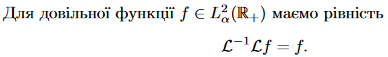<br>**

<hr>

*. Завдання: виконати обернене перетворення Лаґерра для своєї фунції.

Функція: 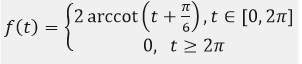

In [111]:
def my_func(t):
    if t >= 0 and t <= 2*np.pi:
        return 2*(np.pi/2-np.arctan(t+np.pi/6))
    else:
        return 0

Візуалізую графік своєї функції та оберненого перетворення Лаґерра:

In [112]:
n_slider3 =  widgets.IntSlider(value=10, min=1, max=15, step=1, description='N=')
interactive_plot3 = interactive(draw_rlt,f=widgets.fixed(my_func), N=n_slider, epsilon=widgets.fixed(0.001), beta=widgets.fixed(2), sigma=widgets.fixed(4))

display(interactive_plot3)

interactive(children=(IntSlider(value=1, description='N=', max=15, min=1), Output()), _dom_classes=('widget-in…

<hr>

<h3>Висновок: У ході виконання цієї лабораторної роботи я побудував функції для обчислення та табулювання функцій Лаґерра, провів обчислювальний експеримент для визначення точки T, обчислив значення інтегралів, виконав пряме та обернене ПЛ для заданої функції, а також побудував графіки для візуалізації результатів. Ця робота допомогла мені краще зрозуміти функції Лаґерра та їх реалізацію на мові Python.<h3>